Fetching details for the first 20 Pokémon...
Available Pokémon types among the first 20:  Bug, Fire, Flying, Grass, Normal, Poison, Water
Available stats to plot:  height, weight, base_experience
Showing only Pokémon of type Bug: ['Caterpie', 'Metapod', 'Butterfree', 'Weedle', 'Kakuna', 'Beedrill']


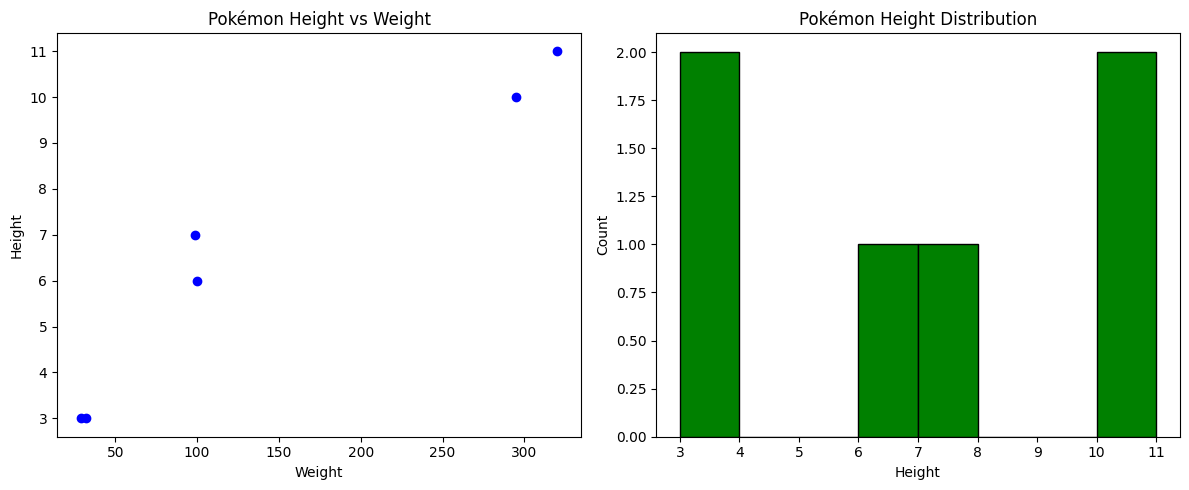

In [5]:
# This simple script fetches Pokémon data from an API, lets the user specify a type and stat to plot,
# and shows two quick matplotlib plots.

import requests
import pandas as pd
import matplotlib.pyplot as plt

# API endpoint and initial data fetch
api_url = "https://pokeapi.co/api/v2/pokemon"

response = requests.get(api_url)

if response.status_code == 200:
    data = response.json()
    results = data['results']
    pokemons = []
    print("Fetching details for the first 20 Pokémon...")
    for poke in results:
        poke_detail = requests.get(poke['url']).json()
        pokemons.append({
            'name': poke_detail['name'].capitalize(),
            'height': poke_detail['height'],
            'weight': poke_detail['weight'],
            'base_experience': poke_detail['base_experience'],
            'types': ', '.join([t['type']['name'].capitalize() for t in poke_detail['types']])
        })
    df = pd.DataFrame(pokemons)

    # Prompt user for a type and stat
    all_types = sorted(set(sum([p['types'].replace(" ", "").split(',') for p in pokemons], [])))
    print("Available Pokémon types among the first 20: ", ', '.join(all_types))
    selected_type = input("Enter a Pokémon type to filter by (or press Enter to skip): ").capitalize()
    stats = ['height', 'weight', 'base_experience']
    print("Available stats to plot: ", ', '.join(stats))
    selected_stat = input(f"Enter a stat to plot histograms for (height, weight, base_experience): ").lower()
    if selected_stat not in stats:
        print("Invalid stat selected. Falling back to 'height'.")
        selected_stat = 'height'

    # Filter DataFrame by type if specified
    if selected_type and selected_type in all_types:
        filtered = df[df['types'].str.contains(selected_type, case=False)]
        print(f"Showing only Pokémon of type {selected_type}: {filtered['name'].tolist()}")
    else:
        filtered = df
        print("Showing all available Pokémon.")

    # Make basic visualizations using matplotlib subplots
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))

    # Scatter plot: height vs weight
    axs[0].scatter(filtered['weight'], filtered['height'], color='blue')
    axs[0].set_xlabel('Weight')
    axs[0].set_ylabel('Height')
    axs[0].set_title('Pokémon Height vs Weight')

    # Histogram of selected stat
    axs[1].hist(filtered[selected_stat], bins=8, color='green', edgecolor='k')
    axs[1].set_xlabel(selected_stat.capitalize())
    axs[1].set_ylabel('Count')
    axs[1].set_title(f'Pokémon {selected_stat.capitalize()} Distribution')

    plt.tight_layout()
    plt.show()

else:
    print("Failed to fetch Pokémon data. Please check the API or your connection.")

